# Home 4: Build a CNN for image recognition.

### Name: Harman Singh Bath


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2020S/blob/master/homework/HM4/HM4.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. 
One-hot encode transform such a scalar to a $10$-dim vector.

E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
def to_one_hot(y, num_class=10):
    one_hot = numpy.zeros((y.shape[0], 10))
    one_hot[numpy.arange((y.shape[0])),y[:,0]] = 1
    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [3]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [7]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [8]:
from keras.callbacks import LearningRateScheduler

# learning rate schedule
class step_decay():
    def __init__(self):
        self.initial_lrate = 0.0005
        self.drop = 0.5
        self.epochs_drop = 40.0
        
    def __call__(self, epoch):
        lrate = self.initial_lrate * numpy.power(self.drop, numpy.floor((1+epoch)/self.epochs_drop))
        print("lrate: ", lrate)
        return lrate

In [9]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0),
              metrics=['acc'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay())
callbacks_list = [lrate]

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,  
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True,
        data_format='channels_last',
        validation_split=0.0)

datagen.fit(x_tr)

In [53]:
history = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32), steps_per_epoch=int(len(x_tr)/32), epochs=500, validation_data=(x_val, y_val), callbacks=callbacks_list)

Epoch 1/500
lrate:  0.0005
1250/1250 [==============================] - 22s 18ms/step - loss: 0.9204 - acc: 0.6851 - val_loss: 0.8297 - val_acc: 0.7320
Epoch 2/500
lrate:  0.0005
1250/1250 [==============================] - 22s 18ms/step - loss: 0.9139 - acc: 0.6903 - val_loss: 0.7686 - val_acc: 0.7496
Epoch 3/500
lrate:  0.0005
1250/1250 [==============================] - 22s 18ms/step - loss: 0.9074 - acc: 0.6904 - val_loss: 0.7328 - val_acc: 0.7596
Epoch 4/500
lrate:  0.0005
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8920 - acc: 0.6960 - val_loss: 0.7691 - val_acc: 0.7484
Epoch 5/500
lrate:  0.0005
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8833 - acc: 0.6987 - val_loss: 0.7523 - val_acc: 0.7506
Epoch 6/500
lrate:  0.0005
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8803 - acc: 0.7026 - val_loss: 0.8059 - val_acc: 0.7403
Epoch 7/500
lrate:  0.0005
1250/1250 [==============================] - 22s 18ms/step - 

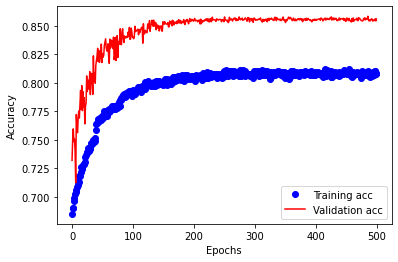

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [12]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

#def reset_weights(model):
#    session = K.get_session()
#    for layer in model.layers: 
#        if hasattr(layer, 'kernel_initializer'):
#           layer.kernel.initializer.run(session=session)

#reset_weights(model)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0),
              metrics=['acc'])
# learning schedule callback
# lrate = LearningRateScheduler(step_decay())
callbacks_list = [lrate]

datagen = ImageDataGenerator(
        rotation_range=40,  
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True,
        data_format='channels_last',
        validation_split=0.0)
datagen.fit(x_train)

In [13]:
history = model.fit_generator(datagen.flow(x_train, y_train_vec, batch_size=32), steps_per_epoch=int(len(x_train)/32), epochs=500, callbacks=callbacks_list)

Epoch 1/500
lrate:  0.0005
1562/1562 [==============================] - 30s 19ms/step - loss: 2.0755 - acc: 0.3105
Epoch 2/500
lrate:  0.0005
1562/1562 [==============================] - 26s 17ms/step - loss: 1.5478 - acc: 0.4427
Epoch 3/500
lrate:  0.0005
1562/1562 [==============================] - 28s 18ms/step - loss: 1.3934 - acc: 0.5017
Epoch 4/500
lrate:  0.0005
1562/1562 [==============================] - 26s 16ms/step - loss: 1.2986 - acc: 0.5402 1s -
Epoch 5/500
lrate:  0.0005
1562/1562 [==============================] - 24s 15ms/step - loss: 1.2247 - acc: 0.5698 0s - loss: 1.2256 - acc:
Epoch 6/500
lrate:  0.0005
1562/1562 [==============================] - 26s 16ms/step - loss: 1.1693 - acc: 0.5878
Epoch 7/500
lrate:  0.0005
1562/1562 [==============================] - 24s 15ms/step - loss: 1.1284 - acc: 0.6091
Epoch 8/500
lrate:  0.0005
1562/1562 [==============================] - 24s 15ms/step - loss: 1.0873 - acc: 0.6210
Epoch 9/500
lrate:  0.0005
1562/1562 [============

1562/1562 [==============================] - 25s 16ms/step - loss: 0.6767 - acc: 0.7726
Epoch 68/500
lrate:  0.00025
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6756 - acc: 0.7739
Epoch 69/500
lrate:  0.00025
1562/1562 [==============================] - 27s 17ms/step - loss: 0.6706 - acc: 0.7759 0s - loss: 0.6711
Epoch 70/500
lrate:  0.00025
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6759 - acc: 0.7732
Epoch 71/500
lrate:  0.00025
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6737 - acc: 0.7734
Epoch 72/500
lrate:  0.00025
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6688 - acc: 0.7742
Epoch 73/500
lrate:  0.00025
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6701 - acc: 0.7764
Epoch 74/500
lrate:  0.00025
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6750 - acc: 0.7729
Epoch 75/500
lrate:  0.00025
1562/1562 [==============================] - 2

1562/1562 [==============================] - 25s 16ms/step - loss: 0.6025 - acc: 0.7963
Epoch 134/500
lrate:  6.25e-05
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6004 - acc: 0.7994
Epoch 135/500
lrate:  6.25e-05
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5979 - acc: 0.7992
Epoch 136/500
lrate:  6.25e-05
1562/1562 [==============================] - 25s 16ms/step - loss: 0.5993 - acc: 0.8004
Epoch 137/500
lrate:  6.25e-05
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6031 - acc: 0.8003
Epoch 138/500
lrate:  6.25e-05
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5961 - acc: 0.8005 0s - loss: 0.5959 - acc: 0.8
Epoch 139/500
lrate:  6.25e-05
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6057 - acc: 0.7960 1s - l
Epoch 140/500
lrate:  6.25e-05
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6042 - acc: 0.7971
Epoch 141/500
lrate:  6.25e-05
1562/1562 [=

1562/1562 [==============================] - 27s 17ms/step - loss: 0.5904 - acc: 0.8033
Epoch 199/500
lrate:  3.125e-05
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5814 - acc: 0.8054
Epoch 200/500
lrate:  1.5625e-05
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5780 - acc: 0.8060
Epoch 201/500
lrate:  1.5625e-05
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5826 - acc: 0.8058
Epoch 202/500
lrate:  1.5625e-05
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5848 - acc: 0.8034
Epoch 203/500
lrate:  1.5625e-05
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5817 - acc: 0.8032 0s - loss: 0.5812 - acc: 0
Epoch 204/500
lrate:  1.5625e-05
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5813 - acc: 0.8057
Epoch 205/500
lrate:  1.5625e-05
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5850 - acc: 0.8017
Epoch 206/500
lrate:  1.5625e-05
1562/1

1562/1562 [==============================] - 26s 17ms/step - loss: 0.5811 - acc: 0.8048
Epoch 263/500
lrate:  7.8125e-06
1562/1562 [==============================] - 27s 18ms/step - loss: 0.5786 - acc: 0.8065
Epoch 264/500
lrate:  7.8125e-06
1562/1562 [==============================] - 30s 19ms/step - loss: 0.5712 - acc: 0.8082
Epoch 265/500
lrate:  7.8125e-06
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5743 - acc: 0.8076
Epoch 266/500
lrate:  7.8125e-06
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5804 - acc: 0.8055
Epoch 267/500
lrate:  7.8125e-06
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5757 - acc: 0.8089 0s - loss: 0.5757 - acc: 0.809
Epoch 268/500
lrate:  7.8125e-06
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5755 - acc: 0.8072
Epoch 269/500
lrate:  7.8125e-06
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5818 - acc: 0.8042
Epoch 270/500
lrate:  7.8125e-06
1

1562/1562 [==============================] - 24s 16ms/step - loss: 0.5784 - acc: 0.8052
Epoch 328/500
lrate:  1.953125e-06
1562/1562 [==============================] - 23s 14ms/step - loss: 0.5740 - acc: 0.8067
Epoch 329/500
lrate:  1.953125e-06
1562/1562 [==============================] - 22s 14ms/step - loss: 0.5726 - acc: 0.8072
Epoch 330/500
lrate:  1.953125e-06
1562/1562 [==============================] - 24s 15ms/step - loss: 0.5710 - acc: 0.8091
Epoch 331/500
lrate:  1.953125e-06
1562/1562 [==============================] - 22s 14ms/step - loss: 0.5679 - acc: 0.8100
Epoch 332/500
lrate:  1.953125e-06
1562/1562 [==============================] - 22s 14ms/step - loss: 0.5737 - acc: 0.8062
Epoch 333/500
lrate:  1.953125e-06
1562/1562 [==============================] - 24s 16ms/step - loss: 0.5757 - acc: 0.8066
Epoch 334/500
lrate:  1.953125e-06
1562/1562 [==============================] - 22s 14ms/step - loss: 0.5751 - acc: 0.8068
Epoch 335/500
lrate:  1.953125e-06
1562/1562 [=====

1562/1562 [==============================] - 25s 16ms/step - loss: 0.5743 - acc: 0.8105
Epoch 392/500
lrate:  9.765625e-07
1562/1562 [==============================] - ETA: 0s - loss: 0.5779 - acc: 0.8061- ETA: 0s - loss: 0.5779 - acc:  - 23s 15ms/step - loss: 0.5780 - acc: 0.8061
Epoch 393/500
lrate:  9.765625e-07
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5765 - acc: 0.8062
Epoch 394/500
lrate:  9.765625e-07
1562/1562 [==============================] - 25s 16ms/step - loss: 0.5630 - acc: 0.8108
Epoch 395/500
lrate:  9.765625e-07
1562/1562 [==============================] - 24s 15ms/step - loss: 0.5775 - acc: 0.8069
Epoch 396/500
lrate:  9.765625e-07
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5748 - acc: 0.8065
Epoch 397/500
lrate:  9.765625e-07
1562/1562 [==============================] - 31s 20ms/step - loss: 0.5702 - acc: 0.8077
Epoch 398/500
lrate:  9.765625e-07
1562/1562 [==============================] - 31s 20ms/step - loss: 0

1562/1562 [==============================] - 26s 17ms/step - loss: 0.5725 - acc: 0.8075
Epoch 454/500
lrate:  2.44140625e-07
1562/1562 [==============================] - 25s 16ms/step - loss: 0.5730 - acc: 0.8104
Epoch 455/500
lrate:  2.44140625e-07
1562/1562 [==============================] - 24s 15ms/step - loss: 0.5714 - acc: 0.8085
Epoch 456/500
lrate:  2.44140625e-07
1562/1562 [==============================] - 27s 17ms/step - loss: 0.5734 - acc: 0.8064 0s - loss: 0.5734 - acc
Epoch 457/500
lrate:  2.44140625e-07
1562/1562 [==============================] - 25s 16ms/step - loss: 0.5721 - acc: 0.8091
Epoch 458/500
lrate:  2.44140625e-07
1562/1562 [==============================] - 24s 15ms/step - loss: 0.5776 - acc: 0.8065 0s - loss: 0.5769 -
Epoch 459/500
lrate:  2.44140625e-07
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5711 - acc: 0.8097
Epoch 460/500
lrate:  2.44140625e-07
1562/1562 [==============================] - 26s 16ms/step - loss: 0.5720 - acc: 

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [14]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 2s 238us/step
loss = 0.46797399830818176
accuracy = 0.8555999994277954


In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))